[Kaggle Titanic Dataset link is provided on drive](https://drive.google.com/file/d/1sHZoOhKGsNIRIPdrd0RKdCb_eufVPV6m/view)

In [1]:
import pandas as pd

In [2]:
titanic_data= pd.read_csv('titanic.csv')

# Understanding the data

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data dictionary from kaggle

| **Variable** | **Definition**                                          | **Key**                                       |
|--------------|---------------------------------------------------------|-----------------------------------------------|
| survival     | Survival                                                | 0 = No, 1 = Yes                              |
| pclass       | Ticket class                                            | 1 = 1st, 2 = 2nd, 3 = 3rd                    |
| sex          | Sex                                                     |                                               |
| age          | Age in years                                            |                                               |
| sibsp        | # of siblings / spouses aboard the Titanic              |                                               |
| parch        | # of parents / children aboard the Titanic              |                                               |
| ticket       | Ticket number                                           |                                               |
| fare         | Passenger fare                                          |                                               |
| cabin        | Cabin number                                            |                                               |
| embarked     | Port of Embarkation                                     | C = Cherbourg, Q = Queenstown, S = Southampton |


In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 1. Find the survival rate for passengers with a fare below 10.

In [6]:
low_fare_passengers = titanic_data[titanic_data['Fare'] < 10]
survival_rate_low_fare = low_fare_passengers['Survived'].mean() * 100
print(survival_rate_low_fare)

19.940476190476193


The survival rate for passengers with a fare below 10 are appropoxmately 19.94%.

# 2. Create a count plot for gender with survival as the hue.

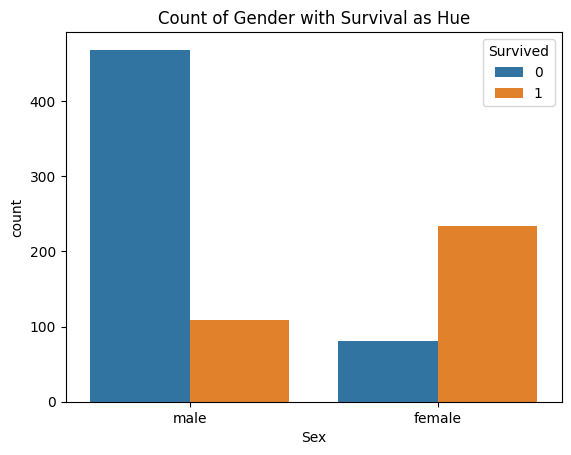

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=titanic_data, x='Sex', hue='Survived')
plt.title('Count of Gender with Survival as Hue')
plt.show()

# 3. Determine the survival rate for passengers from each embarkation point.

In [7]:
survival_rate_by_embarkation = titanic_data.groupby('Embarked')['Survived'].mean() * 100
survival_rate_by_embarkation.index = ['Cherbourg', 'Queenstown', 'Southampton']
survival_rate_by_embarkation.name = 'Survival Rate by Embarkation in percents(%)'
survival_rate_by_embarkation=pd.DataFrame(survival_rate_by_embarkation)
survival_rate_by_embarkation

,Survival Rate by Embarkation in percents(%)
Cherbourg,55.357143
Queenstown,38.961039
Southampton,33.695652


# 4. Analyze the age distribution of passengers in each class using a box plot.

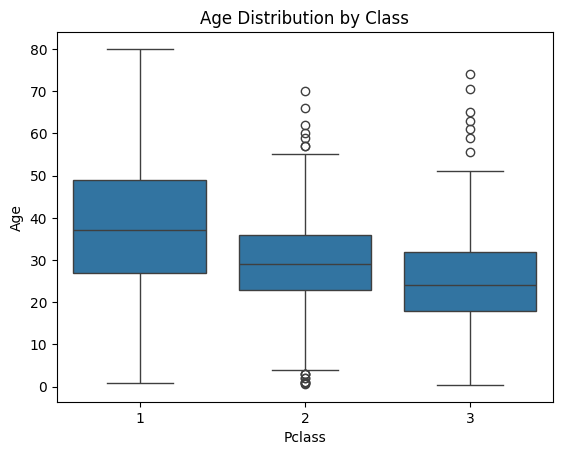

In [8]:
sns.boxplot(data=titanic_data, x='Pclass', y='Age')
plt.title('Age Distribution by Class')
plt.show()

# 5. Replace missing age values with a random value sampled from the age distribution.

In [9]:
import numpy as np

# Calculate the mean and standard deviation of the 'Age' column
age_mean = titanic_data['Age'].mean()
age_std = titanic_data['Age'].std()

# Create random values for missing 'Age' values
random_ages = np.random.normal(age_mean, age_std, titanic_data['Age'].isnull().sum())

# Ensure the index of the random ages aligns with the NaN indices of the 'Age' column
random_ages_series = pd.Series(random_ages, index=titanic_data[titanic_data['Age'].isnull()].index)

# Replace missing values in 'Age' column with these random values
titanic_data['Age'] = titanic_data['Age'].fillna(random_ages_series)

# Verify if there are any missing values left
print("The task executed successfully\n" if (titanic_data['Age'].isnull().sum() == 0) else "Sorry, something is wrong")

print("Info about the dataset:")
print(pd.DataFrame(titanic_data.info()))
print("\nNew age colume will be:\n",titanic_data['Age'])

The task executed successfully

Info about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Empty DataFrame
Columns: []
Index: []

New age colume will be:
 0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887  

# 6. Plot a pie chart showing the proportion of passengers in each deck.

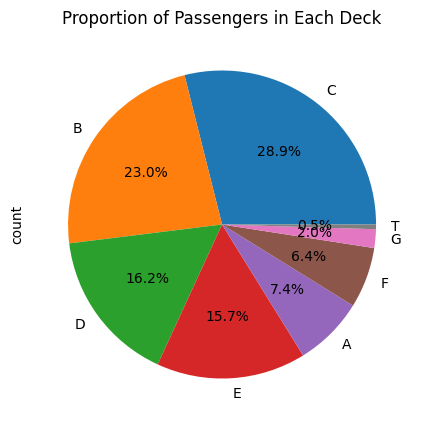

In [10]:
# Extract the deck information
titanic_data['Deck'] = titanic_data['Cabin'].str[0]

# Plot a pie chart of deck proportions
deck_proportions = titanic_data['Deck'].value_counts()
deck_proportions.plot.pie(autopct='%1.1f%%', figsize=(5,5))
plt.title('Proportion of Passengers in Each Deck')
plt.show()